https://www.kaggle.com/datasets/sid321axn/heart-statlog-cleveland-hungary-final

## Pre-processing

In [2]:
import pandas as pd
import numpy as np

In [3]:
raw = pd.read_csv('heart.csv')
raw.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
raw.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


### Outliers

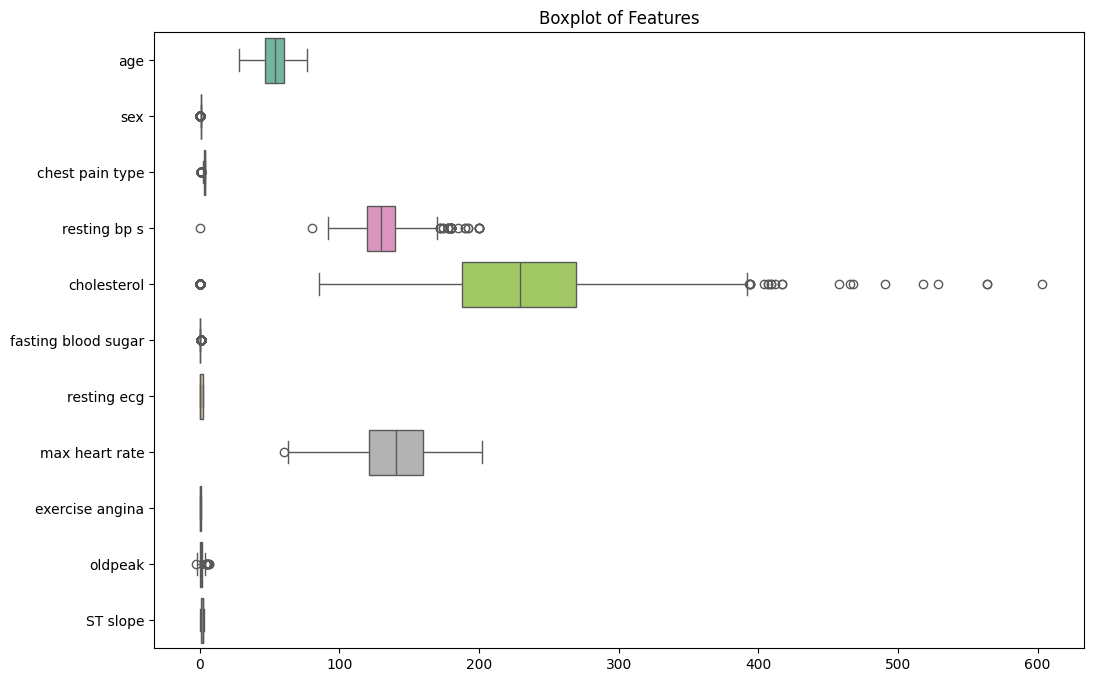

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(data=raw.drop(columns="target"), orient='h', palette='Set2')
plt.title('Boxplot of Features')
plt.show()


In [7]:
def remove_extreme_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (3 * IQR)
    upper_bound = Q3 + (3 * IQR)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [8]:
remOutliers = remove_extreme_outliers(raw, 'cholesterol')
remOutliers.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000
mean,53.716456,0.764557,3.232068,132.185654,208.907173,0.213502,0.697890,139.727426,0.388186,0.923122,1.622785,0.528270
std,9.340713,0.424455,0.936850,18.385538,99.097395,0.409952,0.869842,25.551170,0.487543,1.087609,0.611258,0.499411
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,141.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,491.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [9]:
chol_median = remOutliers['cholesterol'].median()
remOutliers['cholesterol'] = remOutliers['cholesterol'].replace(0, chol_median)
remOutliers.describe()

C:\Users\carli\AppData\Local\Temp\ipykernel_8500\4259170771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remOutliers['cholesterol'] = remOutliers['cholesterol'].replace(0, chol_median)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000
mean,53.716456,0.764557,3.232068,132.185654,242.145992,0.213502,0.697890,139.727426,0.388186,0.923122,1.622785,0.528270
std,9.340713,0.424455,0.936850,18.385538,49.328239,0.409952,0.869842,25.551170,0.487543,1.087609,0.611258,0.499411
min,28.000000,0.000000,1.000000,0.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,214.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,141.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,491.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


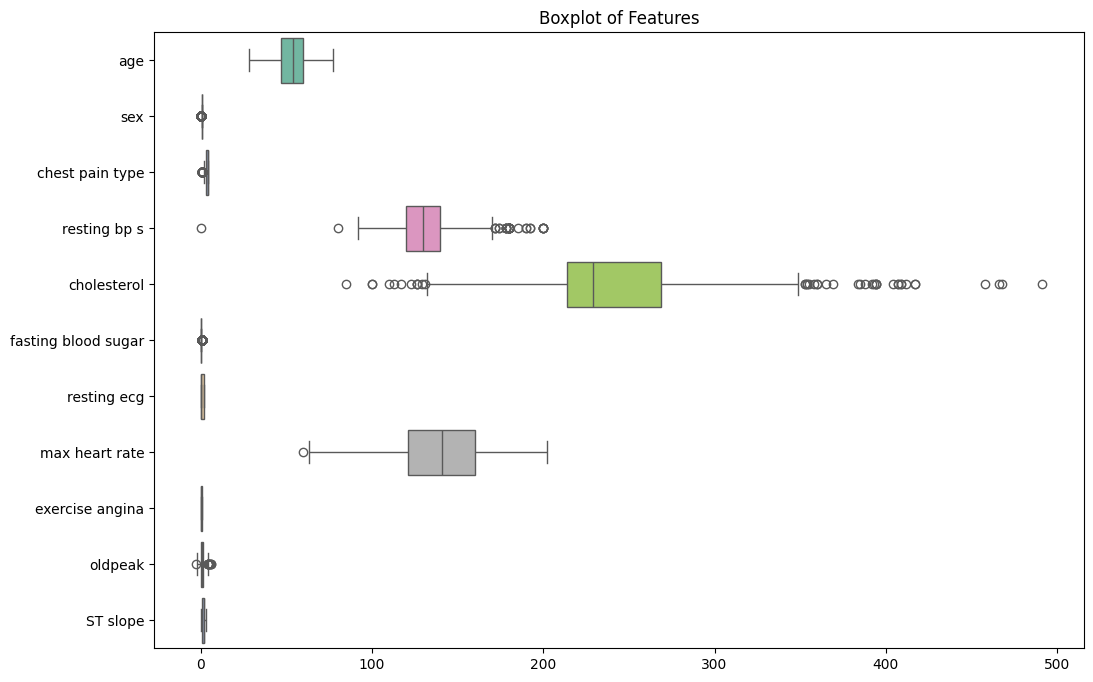

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=remOutliers.drop(columns="target"), orient='h', palette='Set2')
plt.title('Boxplot of Features')
plt.show()

### Scalling

In [11]:

from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()

scaled = remOutliers.copy()
for column in scaled.columns:
    if column != 'target':
        scaled[column] = scaller.fit_transform(scaled[[column]])

scaled.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1.185000e+03,1.185000e+03,1.185000e+03,1.185000e+03,1.185000e+03,1185.000000,1.185000e+03,1.185000e+03,1.185000e+03,1.185000e+03,1.185000e+03,1185.000000
mean,1.678920e-16,2.398456e-17,-4.796913e-17,-6.955524e-16,5.996141e-17,0.000000,2.398456e-17,-1.918765e-16,7.794984e-17,-3.597685e-17,-1.199228e-17,0.528270
std,1.000422e+00,1.000422e+00,1.000422e+00,1.000422e+00,1.000422e+00,1.000422,1.000422e+00,1.000422e+00,1.000422e+00,1.000422e+00,1.000422e+00,0.499411
min,-2.754320e+00,-1.802030e+00,-2.383531e+00,-7.192689e+00,-3.187066e+00,-0.521017,-8.026569e-01,-3.121622e+00,-7.965443e-01,-3.240695e+00,-2.655951e+00,0.000000
25%,-7.193553e-01,5.549297e-01,-2.478151e-01,-6.630646e-01,-5.708267e-01,-0.521017,-8.026569e-01,-7.332476e-01,-7.965443e-01,-8.491212e-01,-1.019288e+00,0.000000
50%,3.036856e-02,5.549297e-01,8.200428e-01,-1.189292e-01,-2.666128e-01,-0.521017,-8.026569e-01,4.982594e-02,-7.965443e-01,-2.972196e-01,6.173739e-01,1.000000
75%,6.729890e-01,5.549297e-01,8.200428e-01,4.252062e-01,5.446241e-01,-0.521017,1.497581e+00,7.937458e-01,1.255423e+00,6.226164e-01,6.173739e-01,1.000000
max,2.493747e+00,5.549297e-01,8.200428e-01,3.690019e+00,5.046989e+00,1.919321,1.497581e+00,2.438200e+00,1.255423e+00,4.853862e+00,2.254036e+00,1.000000


### Spliting

In [12]:
from sklearn.model_selection import train_test_split

X = scaled.drop(columns='target')
y = scaled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## KNN

### Hyperparams

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'n_jobs': [1, 10, 20, 30]
}

knn_test = KNeighborsClassifier()

grid_search = GridSearchCV(knn_test, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best f1 score: ", grid_search.best_score_)

Best parameters found:  {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_jobs': 1, 'n_neighbors': 11, 'weights': 'distance'}
Best f1 score:  0.9135732859841725


### Cross Validation

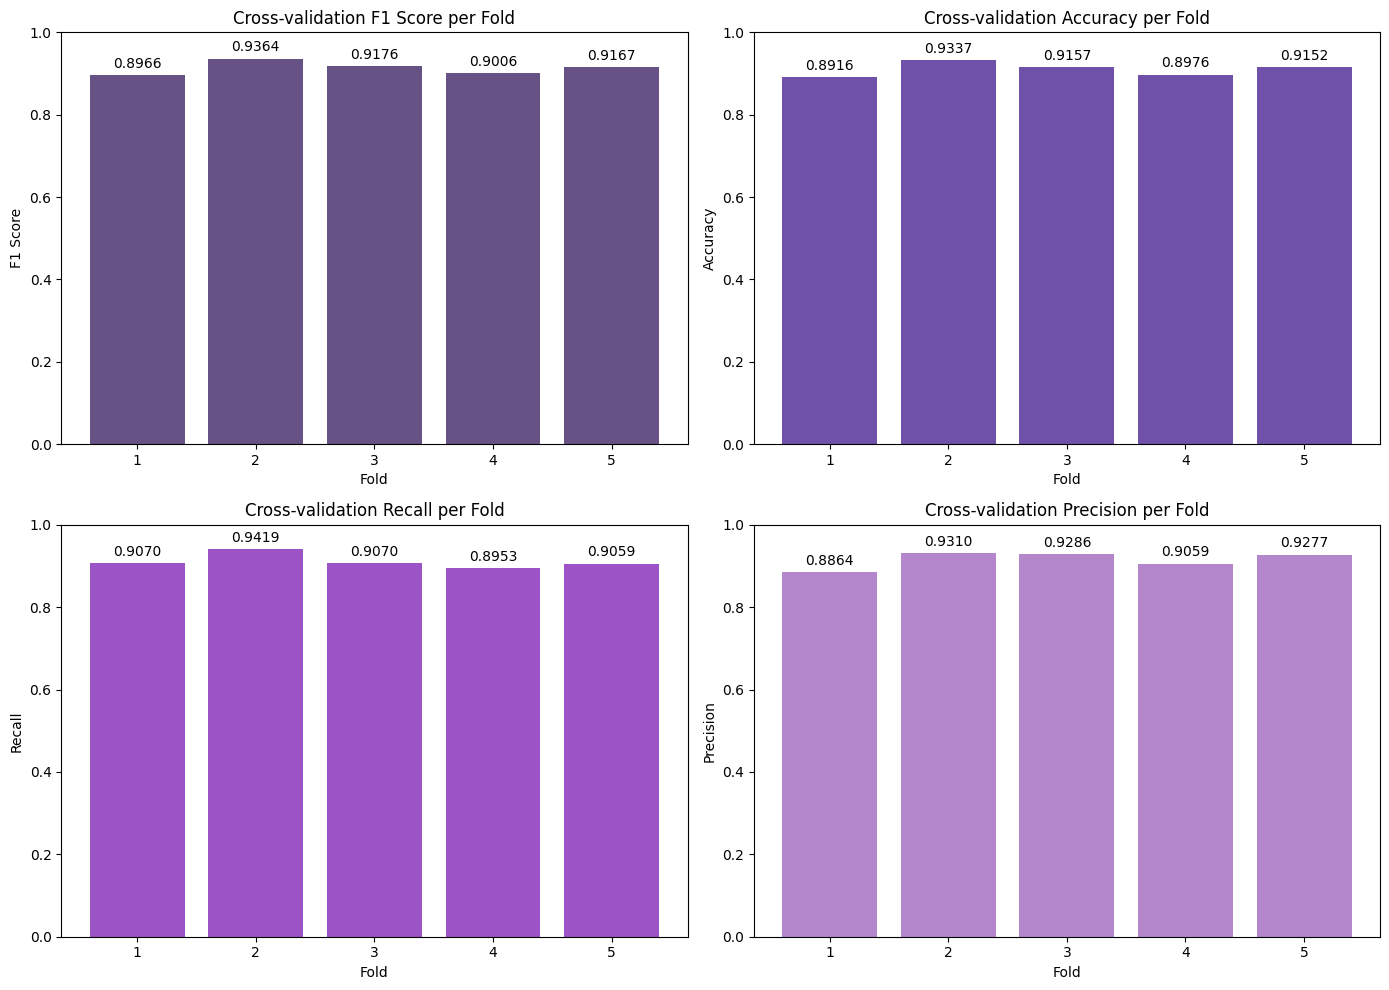

,F1 Score,Accuracy,Recall,Precision
0,0.913573,0.910741,0.911409,0.915913


In [14]:

from sklearn.model_selection import cross_val_score

knn_best = KNeighborsClassifier(**grid_search.best_params_)
knn_best.fit(X_train, y_train)


metrics = {
    'F1 Score': 'f1',
    'Accuracy': 'accuracy',
    'Recall': 'recall',
    'Precision': 'precision'
}
purple_shades = ["#260853", "#330785", "#720aad", "#9455b9"]



#* Comparation of metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, (metric_name, metric) in enumerate(metrics.items()):
    scores = cross_val_score(knn_best, X_train, y_train, cv=5, scoring=metric)
    bars = axes[idx].bar(range(1, 6), scores, color=purple_shades[idx % len(purple_shades)], alpha=0.7)
    axes[idx].set_title(f'Cross-validation {metric_name} per Fold')
    axes[idx].set_xlabel('Fold')
    axes[idx].set_ylabel(metric_name)
    axes[idx].set_ylim(0, 1)
    axes[idx].set_xticks(range(1, 6))
    for bar, score in zip(bars, scores):
        axes[idx].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{score:.4f}", ha='center', va='bottom')
    axes[idx].grid(False)

plt.tight_layout()
plt.show()

#* Mean scores
mean_scores = {metric_name: cross_val_score(knn_best, X_train, y_train, cv=5, scoring=metric).mean() for metric_name, metric in metrics.items()}
mean_scores_df = pd.DataFrame(mean_scores, index=[0])
mean_scores_df



### Confusion Matrix

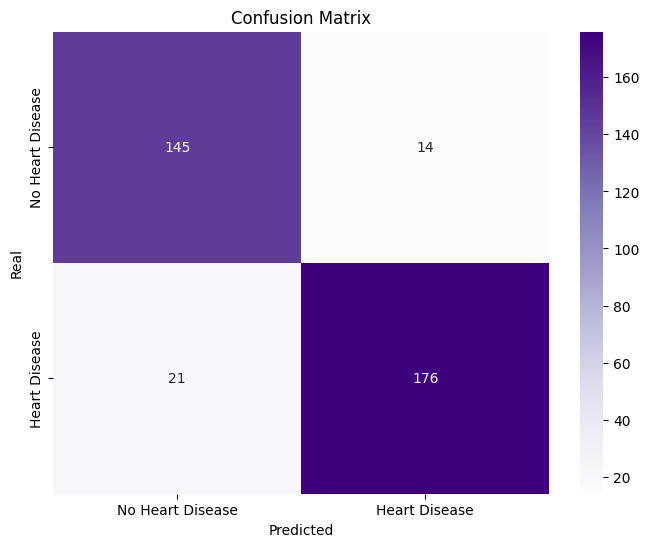

,F1 Score,Accuracy,Recall,Precision,Specificity
0,0.913573,0.910741,0.911409,0.915913,0.91195


In [15]:
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(**grid_search.best_params_)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

tn, fp, fn, tp = cm.ravel()
specificity_knn = tn / (tn + fp)
mean_scores_df['Specificity'] = specificity_knn
mean_scores_df


### Features Importances

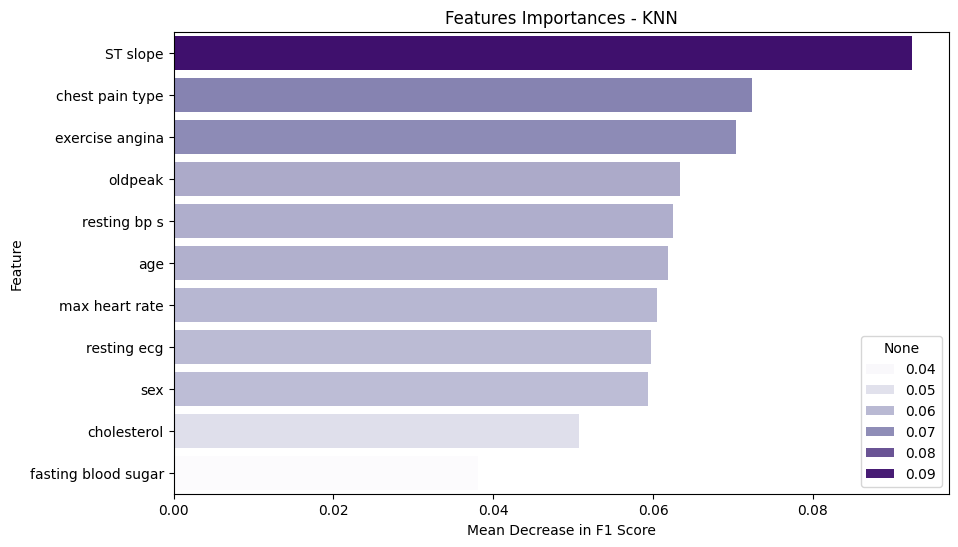

In [104]:
from sklearn.inspection import permutation_importance

result = permutation_importance(knn, X_train, y_train, n_repeats=10, random_state=42, scoring='f1')

importances = pd.Series(result.importances_mean, index=X_train.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index, hue=importances, palette='Purples')
plt.title("Features Importances - KNN")
plt.xlabel("Mean Decrease in F1 Score")
plt.ylabel("Feature")
plt.show()


## Random Forest

### Hyperparams

In [17]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "n_estimators": [10, 50, 100, 200],
    "max_features": [None, "sqrt", "log2"],
    "class_weight": [None, "balanced", "balanced_subsample"]
}

rf_test = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(rf_test, param_grid, cv=5, scoring='f1')
grid_search_rf.fit(X_train, y_train)

print("Best parameters found for Random Forest: ", grid_search_rf.best_params_)
print("Best f1 score for Random Forest: ", grid_search_rf.best_score_)

Best parameters found for Random Forest:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
Best f1 score for Random Forest:  0.90766596367474


### Cross Validation

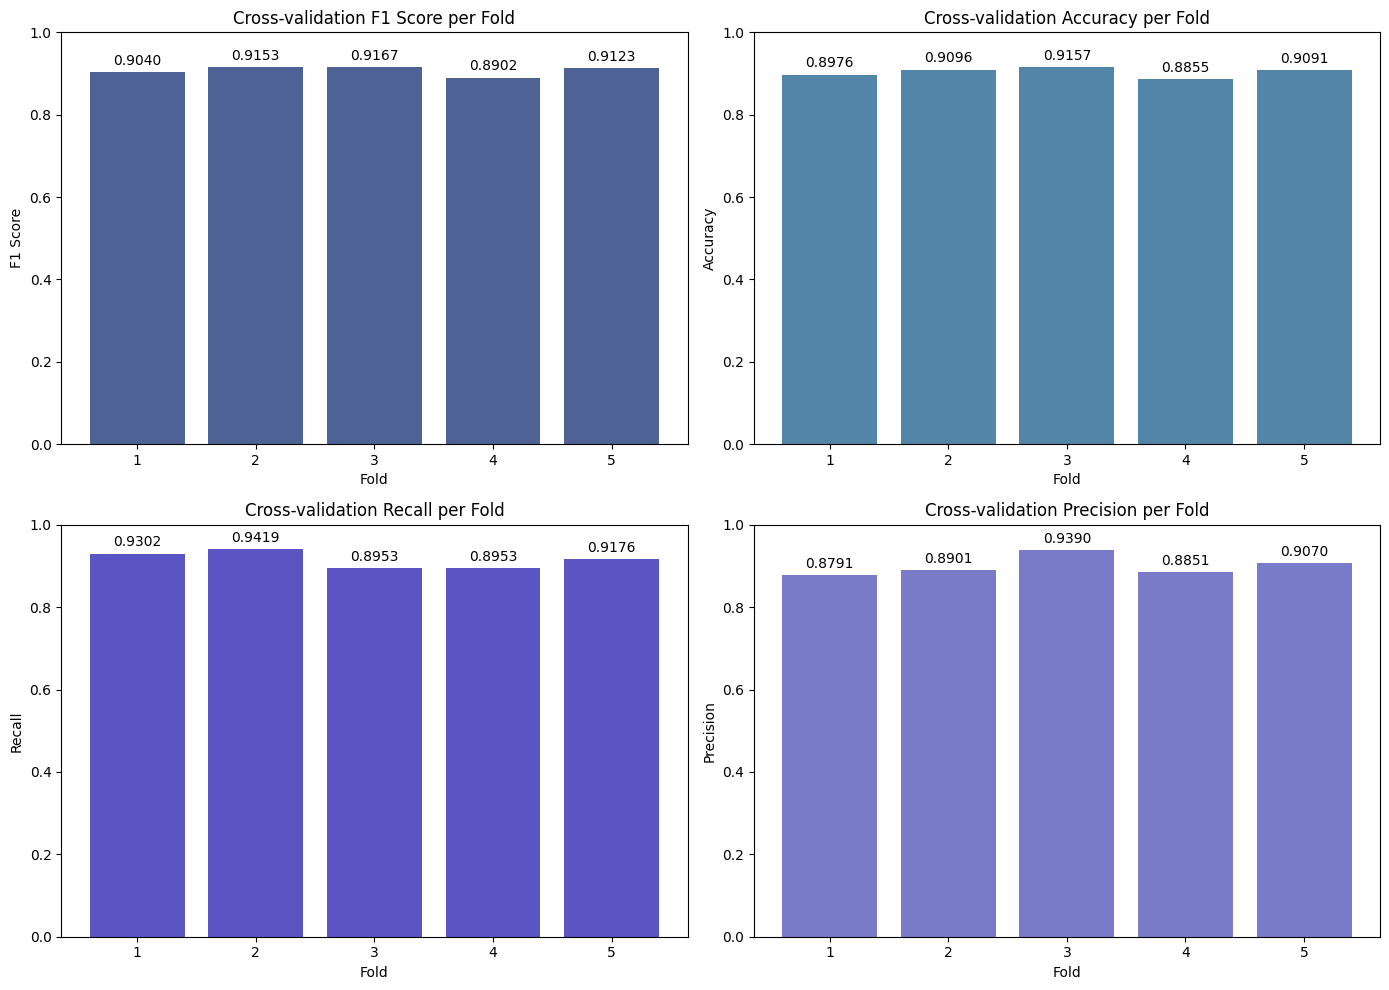

,F1 Score,Accuracy,Recall,Precision
0,0.907666,0.903505,0.916088,0.900058


In [18]:

from sklearn.model_selection import cross_val_score

rf_best = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
rf_best.fit(X_train, y_train)

metrics = {
    'F1 Score': 'f1',
    'Accuracy': 'accuracy',
    'Recall': 'recall',
    'Precision': 'precision'
}

blue_shades = ["#041F68", "#0a5283", "#150baa", "#4143b1"]

#* Comparation of metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, (metric_name, metric) in enumerate(metrics.items()):
    scores = cross_val_score(rf_best, X_train, y_train, cv=5, scoring=metric)
    bars = axes[idx].bar(range(1, 6), scores, color=blue_shades[idx % len(blue_shades)], alpha=0.7)
    axes[idx].set_title(f'Cross-validation {metric_name} per Fold')
    axes[idx].set_xlabel('Fold')
    axes[idx].set_ylabel(metric_name)
    axes[idx].set_ylim(0, 1)
    axes[idx].set_xticks(range(1, 6))
    for bar, score in zip(bars, scores):
        axes[idx].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{score:.4f}", ha='center', va='bottom')
    axes[idx].grid(False)

plt.tight_layout()
plt.show()

#* Mean scores
mean_scores_rf = {metric_name: cross_val_score(rf_best, X_train, y_train, cv=5, scoring=metric).mean() for metric_name, metric in metrics.items()}
mean_scores_rf_df = pd.DataFrame(mean_scores_rf, index=[0])
mean_scores_rf_df


### Confusion Matrix

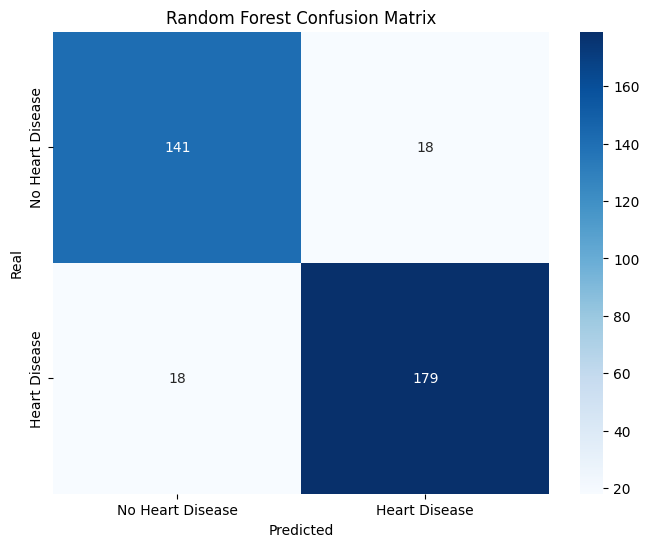

,F1 Score,Accuracy,Recall,Precision,Specificity
0,0.907666,0.903505,0.916088,0.900058,0.886792


In [97]:
rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

tn, fp, fn, tp = cm_rf.ravel()
specificity_RF = tn / (tn + fp)
mean_scores_rf_df['Specificity'] = specificity_RF
mean_scores_rf_df


### Features Importances

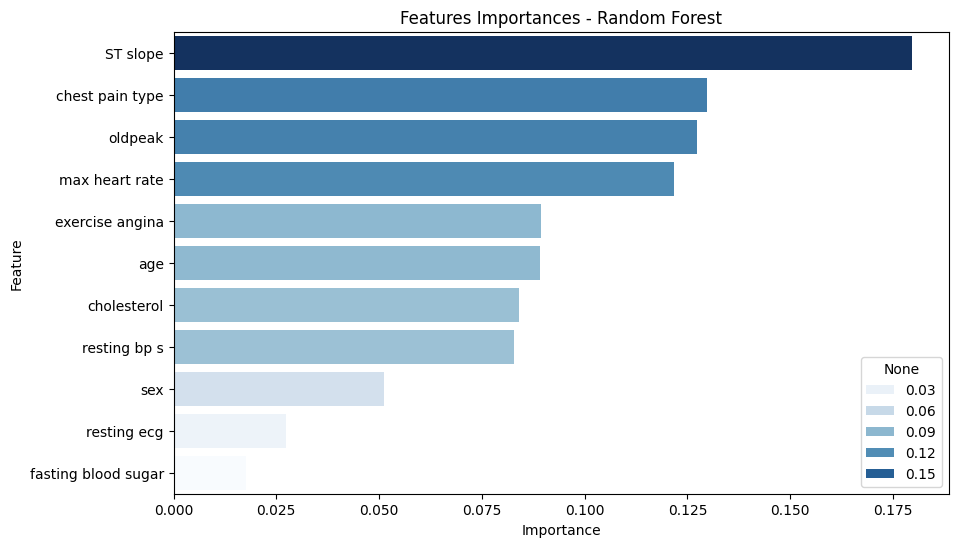

In [20]:
importances_rf = pd.Series(rf.feature_importances_, index=X_train.columns)
importances_rf = importances_rf.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_rf, y=importances_rf.index, hue=importances_rf, palette='Blues')
plt.title("Features Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


## MLP

### Hyperparams

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


def grid_mlp(grid, ind_params):
    if ind_params != None:
        mlp_test = MLPClassifier(**ind_params)
    else:
        mlp_test = MLPClassifier()

    grid_search_mlp = GridSearchCV(mlp_test, grid, cv=5, scoring='f1')
    grid_search_mlp.fit(X_train, y_train)

    print("Best parameters found for MLP: ", grid_search_mlp.best_params_)
    print("Best f1 score for MLP: ", grid_search_mlp.best_score_)


In [ ]:
param_grid_mlp1 = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['logistic', 'tanh', 'relu', 'identity'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant','adaptive'],
    'solver': ['adam', 'sgd'],
}

ind_params1 = {
    'max_iter': 1000,
    'random_state': 42,
}


grid_mlp(param_grid_mlp1, ind_params1)

Best parameters found for MLP:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best f1 score for MLP:  0.8907521905301191


In [22]:
#* ADAM

param_grid_mlp2 = {
    'hidden_layer_sizes': [(10,), (20,), (50,), (10, 5), (20, 10), (50, 25)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1],
    'learning_rate_init': [0.001, 0.01, 0.0001],
    'max_iter': [200, 300, 500, 700],
    'tol': [1e-4, 1e-3],
    'validation_fraction': [0.1, 0.2],
    'n_iter_no_change': [10, 20]
}

ind_params2 = {
    'solver': 'adam',
    'random_state': 42,
    'early_stopping': True
    
}

grid_mlp(param_grid_mlp2, ind_params2)

Best parameters found for MLP:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.01, 'max_iter': 200, 'n_iter_no_change': 10, 'tol': 0.0001, 'validation_fraction': 0.2}
Best f1 score for MLP:  0.8619044665870277


In [23]:
#* LBFGS

param_grid_mlp4 = {
    'hidden_layer_sizes': [(10,), (20,), (50,), (10, 5), (20, 10), (50, 25)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1],
    'max_iter': [300, 600, 900, 1000, 2000],
    'tol': [1e-4, 1e-3],
}

ind_params4 = {
    'solver': 'lbfgs',
    'random_state': 42,
    'early_stopping': True,
    'validation_fraction': 0.2,
    'n_iter_no_change': 20
}

grid_mlp(param_grid_mlp4, ind_params4)

d:\Repositories\PrognosisIschemicCardiovascular\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
d:\Repositories\PrognosisIschemicCardiovascular\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
d:\Repositories\PrognosisIschemicCardiovascular\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.

Best parameters found for MLP:  {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50,), 'max_iter': 1000, 'tol': 0.0001}
Best f1 score for MLP:  0.895389448848894


d:\Repositories\PrognosisIschemicCardiovascular\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


- Best parameters found for MLP:  {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50,), 'max_iter': 1000, 'tol': 0.0001}
- Best f1 score for MLP:  0.895389448848894

In [59]:
grid_search_mlp = {    
    'solver': 'lbfgs',
    'random_state': 42,
    'early_stopping': True,
    'validation_fraction': 0.2,
    'n_iter_no_change': 20,
    'activation': 'relu', 
    'alpha': 0.05, 
    'hidden_layer_sizes': (50,), 
    'max_iter': 4000, 
    'tol': 0.0001
}

### Cross Validation

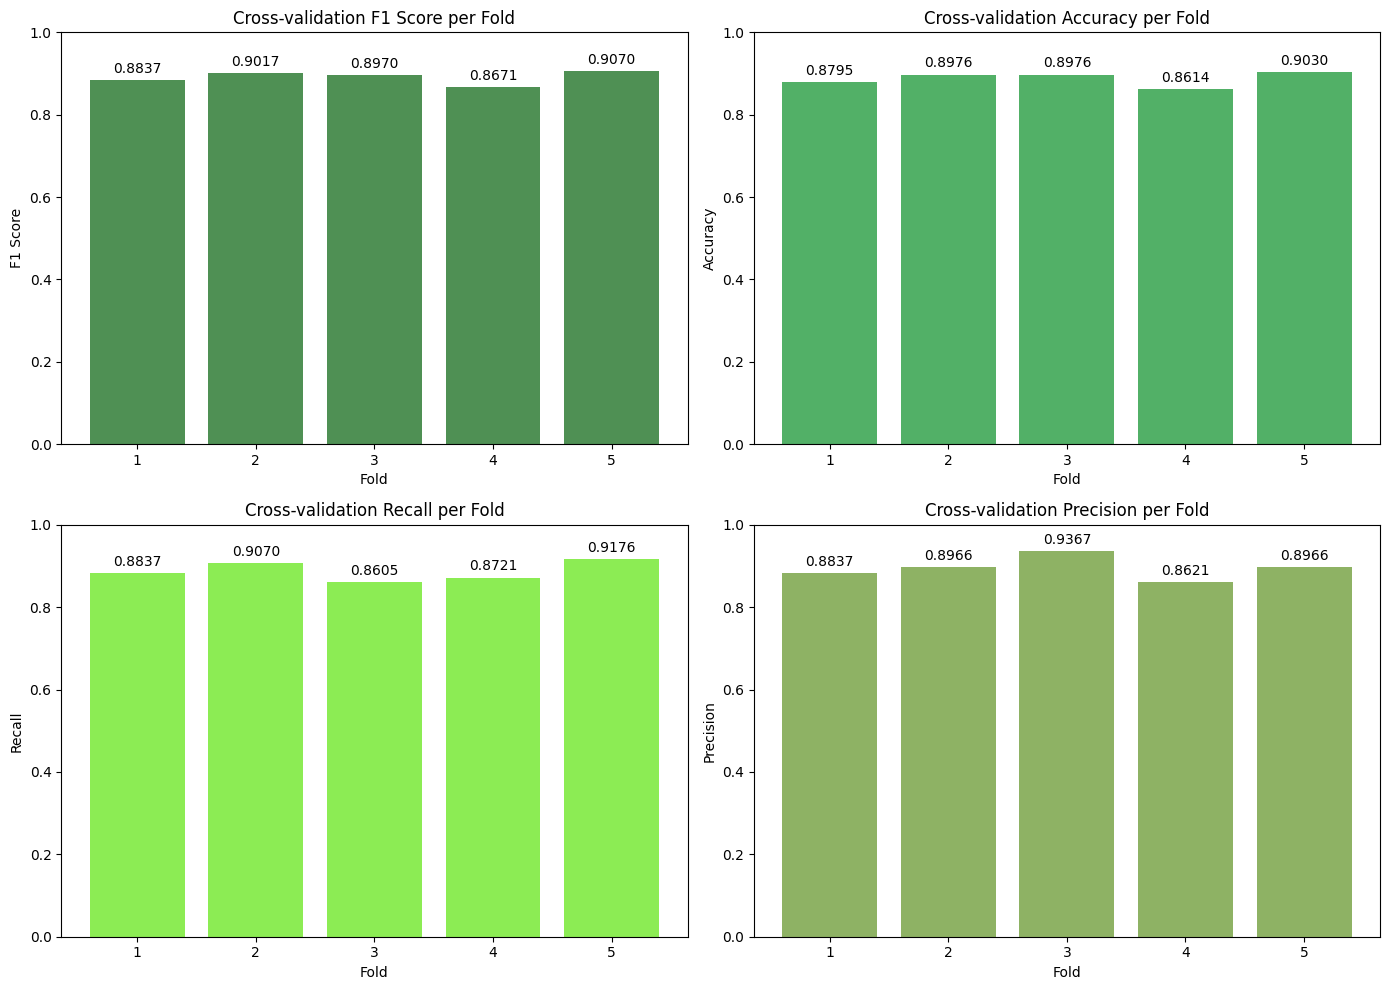

,F1 Score,Accuracy,Recall,Precision
0,0.891291,0.887835,0.888181,0.89512


In [60]:
mlp_final = MLPClassifier(**grid_search_mlp)
mlp_final.fit(X_train, y_train)


metrics = {
    'F1 Score': 'f1',
    'Accuracy': 'accuracy',
    'Recall': 'recall',
    'Precision': 'precision'
}

blue_shades = ["#04610C", "#098f26", "#5be40c", "#5e9222"]

#* Comparison of metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, (metric_name, metric) in enumerate(metrics.items()):
    scores = cross_val_score(mlp_final, X_train, y_train, cv=5, scoring=metric)
    bars = axes[idx].bar(range(1, 6), scores, color=blue_shades[idx % len(blue_shades)], alpha=0.7)
    axes[idx].set_title(f'Cross-validation {metric_name} per Fold')
    axes[idx].set_xlabel('Fold')
    axes[idx].set_ylabel(metric_name)
    axes[idx].set_ylim(0, 1)
    axes[idx].set_xticks(range(1, 6))
    for bar, score in zip(bars, scores):
        axes[idx].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{score:.4f}", ha='center', va='bottom')
    axes[idx].grid(False)

plt.tight_layout()
plt.show()

#* Mean scores
mean_scores_mlp = {metric_name: cross_val_score(mlp_final, X_train, y_train, cv=5, scoring=metric).mean() for metric_name, metric in metrics.items()}
mean_scores_mlp_df = pd.DataFrame(mean_scores_mlp, index=[0])
mean_scores_mlp_df

### Confusion Matrix

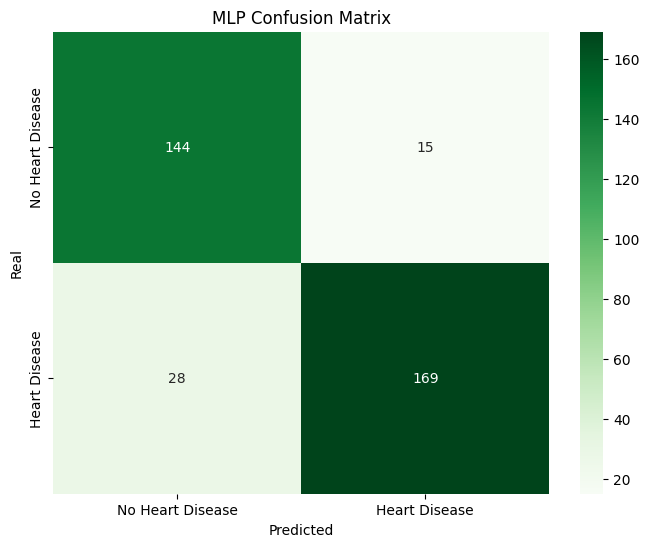

,F1 Score,Accuracy,Recall,Precision,Specificity
0,0.891291,0.887835,0.888181,0.89512,0.90566


In [66]:
y_pred_mlp = mlp_final.predict(X_test)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Greens', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('MLP Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

tn, fp, fn, tp = cm_mlp.ravel()
specificity_mlp = tn / (tn + fp)
mean_scores_mlp_df['Specificity'] = specificity_mlp
mean_scores_mlp_df


### Features Importances

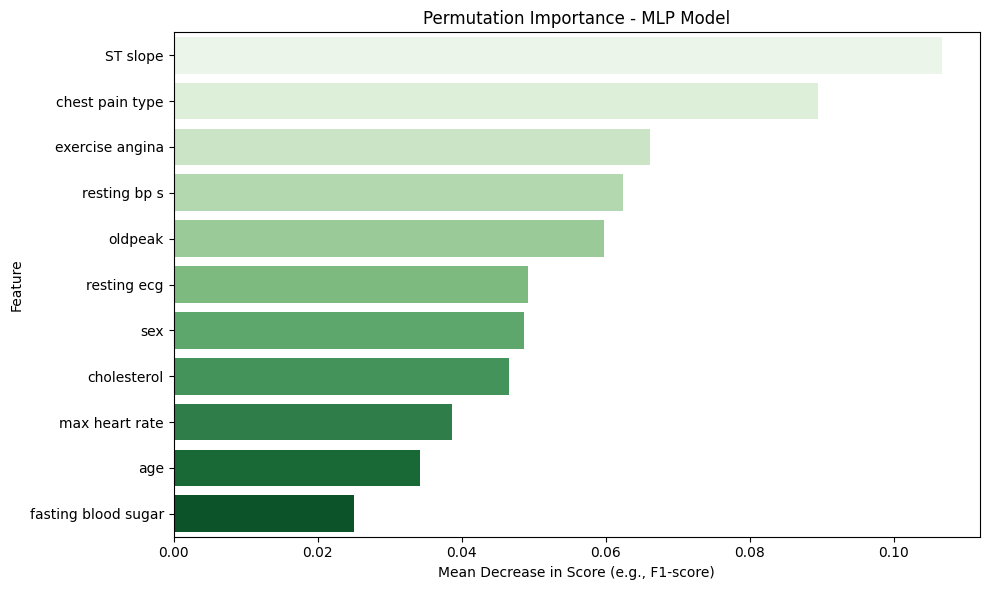


Feature Importances for MLP (Permutation Importance):
ST slope               0.106648
chest pain type        0.089422
exercise angina        0.066111
resting bp s           0.062428
oldpeak                0.059722
resting ecg            0.049252
sex                    0.048708
cholesterol            0.046583
max heart rate         0.038646
age                    0.034228
fasting blood sugar    0.025048
dtype: float64


In [95]:
from sklearn.inspection import permutation_importance

perm_importance_mlp_result = permutation_importance(
    mlp_final,
    X_test,
    y_test,
    scoring='f1', 
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

sorted_importances_mlp_idx = perm_importance_mlp_result.importances_mean.argsort()
importances_mlp_perm = pd.Series(
    perm_importance_mlp_result.importances_mean[sorted_importances_mlp_idx],
    index=X_test.columns[sorted_importances_mlp_idx] 
)
importances_mlp_perm = importances_mlp_perm.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_mlp_perm.values, y=importances_mlp_perm.index, hue=importances_mlp_perm.index, palette='Greens', legend=False)
plt.title("Permutation Importance - MLP Model")
plt.xlabel("Mean Decrease in Score (e.g., F1-score)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

print("\nFeature Importances for MLP (Permutation Importance):")
print(importances_mlp_perm)

## Ensemble Learn

### Hyperparams

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score


mlp_class = MLPClassifier(**grid_search_mlp)
rf_class = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
knn_class = KNeighborsClassifier(**grid_search.best_params_)


base_estimators = [
    ('mlp', mlp_class),
    ('rf', rf_class),
    ('knn', knn_class)
]

In [82]:
from sklearn.model_selection import StratifiedKFold

stacking_class_tuning = StackingClassifier(
    estimators=base_estimators,
    final_estimator= LogisticRegression(random_state=42)
)

param_grid_stacking = {
    'final_estimator__C': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 100.0],
    'final_estimator__penalty': ['l1', 'l2'],
    'final_estimator__solver': ['liblinear', 'saga'],
    'final_estimator__class_weight': [None, 'balanced'],
    'passthrough': [True, False],
    'stack_method': ['predict_proba']
}

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 

grid_search_ens = GridSearchCV(
    estimator = stacking_class_tuning,
    param_grid = param_grid_stacking,
    cv=outer_cv,
    scoring='f1',
    n_jobs=-1
)


grid_search_ens.fit(X_train, y_train)
print("Best parameters found for Stacking Classifier: ", grid_search_ens.best_params_)
print("Best f1 score for Stacking Classifier: ", grid_search_ens.best_score_)

Best parameters found for Stacking Classifier:  {'final_estimator__C': 1.0, 'final_estimator__class_weight': None, 'final_estimator__penalty': 'l2', 'final_estimator__solver': 'liblinear', 'passthrough': False, 'stack_method': 'predict_proba'}
Best f1 score for Stacking Classifier:  0.9183124770782


### Confusion Matrix

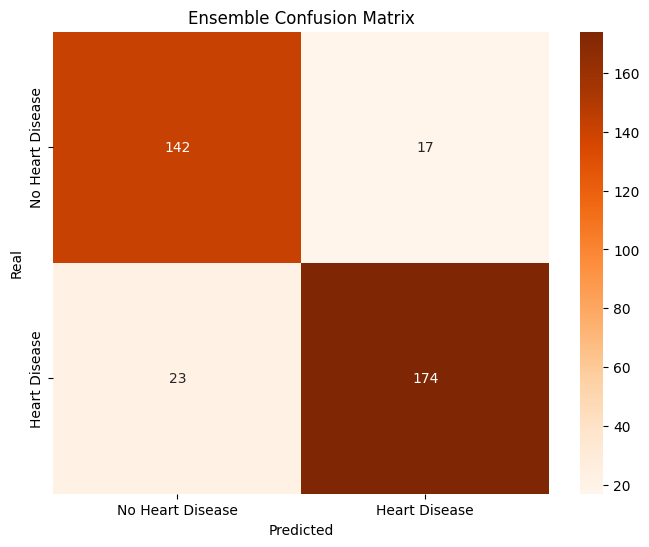

,F1 Score,Accuracy,Recall,Precision,Specificity
0,0.896907,0.88764,0.883249,0.910995,0.893082


In [83]:
ensemble_final = grid_search_ens.best_estimator_
ensemble_final.fit(X_train, y_train)

y_pred_ens = ensemble_final.predict(X_test)
cm_ens = confusion_matrix(y_test, y_pred_ens)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ens, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Ensemble Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

tn, fp, fn, tp = cm_ens.ravel()
specificity_ens = tn / (tn + fp)

mean_scores_ens = {
    'F1 Score': f1_score(y_test, y_pred_ens),
    'Accuracy': (tp + tn) / (tp + tn + fp + fn),
    'Recall': tp / (tp + fn),
    'Precision': tp / (tp + fp),
    'Specificity': specificity_ens
}
mean_scores_ens_df = pd.DataFrame(mean_scores_ens, index=[0])
mean_scores_ens_df


### Features Importances

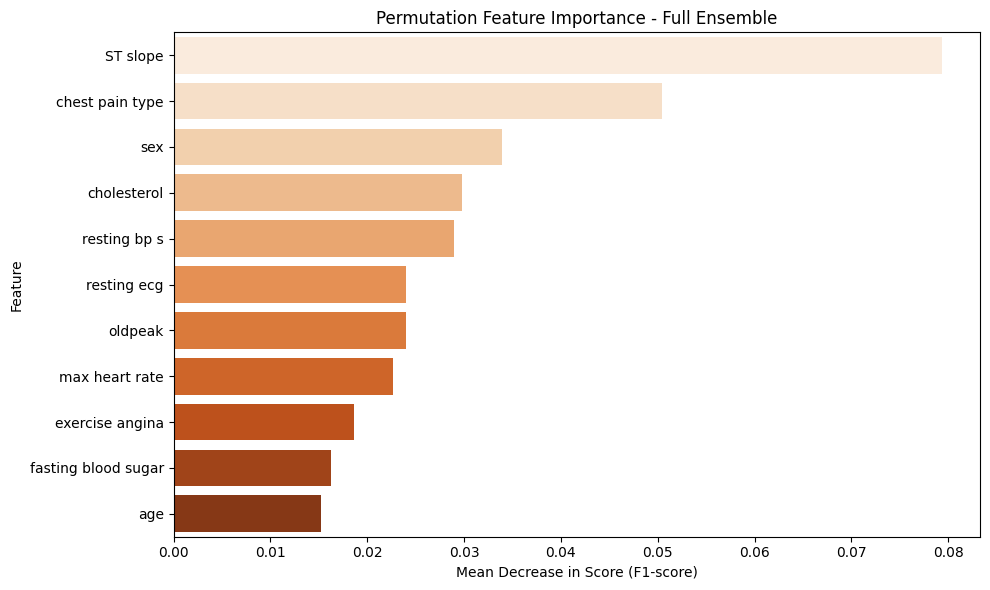


Feature Importances (Permutation Importance):
ST slope               0.079311
chest pain type        0.050454
sex                    0.033879
cholesterol            0.029810
resting bp s           0.028985
resting ecg            0.023997
oldpeak                0.023980
max heart rate         0.022711
exercise angina        0.018661
fasting blood sugar    0.016298
age                    0.015216
dtype: float64


In [94]:
perm_importance_result = permutation_importance(
    ensemble_final,
    X_test,
    y_test,
    scoring='f1',
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

sorted_importances_idx = perm_importance_result.importances_mean.argsort()
importances_ens = pd.Series(
    perm_importance_result.importances_mean[sorted_importances_idx],
    index=X_test.columns[sorted_importances_idx]
)
importances_ens = importances_ens.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_ens.values, y=importances_ens.index, hue=importances_ens.index, palette='Oranges', legend=False)
plt.title("Permutation Feature Importance - Full Ensemble")
plt.xlabel("Mean Decrease in Score (F1-score)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

print("\nFeature Importances (Permutation Importance):")
print(importances_ens)

In [ ]:
mean_scores_df['Model'] = 'KNN'
mean_scores_rf_df['Model'] = 'Random Forest'
mean_scores_mlp_df['Model'] = 'MLP'
mean_scores_ens_df['Model'] = 'Ensemble'


df_results = pd.concat([
    mean_scores_df,
    mean_scores_rf_df,
    mean_scores_mlp_df,
    mean_scores_ens_df
], ignore_index=True)

df_results

,F1 Score,Accuracy,Recall,Precision,Specificity,Model
0,0.913573,0.910741,0.911409,0.915913,0.886792,KNN
1,0.907666,0.903505,0.916088,0.900058,0.886792,Random Forest
2,0.891291,0.887835,0.888181,0.895120,0.905660,MLP
3,0.896907,0.887640,0.883249,0.910995,0.893082,Ensemble


In [103]:
df_results_2dec = df_results.copy()
for col in ['F1 Score', 'Accuracy', 'Recall', 'Precision', 'Specificity']:
    df_results_2dec[col] = df_results_2dec[col].round(2)
df_results_2dec


,F1 Score,Accuracy,Recall,Precision,Specificity,Model
0,0.91,0.91,0.91,0.92,0.89,KNN
1,0.91,0.90,0.92,0.90,0.89,Random Forest
2,0.89,0.89,0.89,0.90,0.91,MLP
3,0.90,0.89,0.88,0.91,0.89,Ensemble
